
<h2 align='center'> MÔN HỌC: HỌC MÁY (MACHINE LEARNING) </h2>

---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---
Nếu dữ liệu huấn luyện chỉ bao gồm các dữ liệu đầu vào x mà không có đầu ra tương ứng. Các thuật toán machine learning có thể không dự đoán được đầu ra nhưng vẫn trích xuất được những thông tin quan trọng dựa trên mối liên quan giữa các điểm dữ liệu. Các thuật toán trong nhóm này được gọi là học không giám sát (unsupervised learning).

* Học máy có giám sát (Supervised learning): Dự đoán đầu ra (label) của một dữ liệu mới (new sample) dựa trên các cặp (sample, label) đã biết từ trước.
* Học máy không giám sát (Unsupervised learning): chỉ có dữ liệu đầu vào (sample) mà không có nhãn (label).

<img src='pic/pic1.jpg' width='700px'>

– Mục đích là khai phá dữ liệu để tìm ra các cấu trúc nội tại trong dữ liệu để thực hiện một công việc nào đó, ví dụ như phân nhóm (clustering) hoặc giảm số chiều của dữ liệu (dimension reduction) để thuận tiện trong việc lưu trữ và tính toán.


## A. Phân cụm khách hàng (Customer Segmentation) với KMeans
---

Từ tập dữ liệu thông tin của 200 khách hàng của trung tâm thương mại phân chia các khách hàng đấy vào những phân khúc (cụm) khách hàng phù hợp

File dữ liệu sử dụng:

**Mall_Custemers.csv**: Tập dữ liệu gồm 200 khách hàng với một số thuộc tính:
1. Gender: Giới tính của khách hàng
2. Age: Tuổi của khách hàng
3. Income: Thu nhập hàng năm của khách hàng (k$)
4. Spending score: Điểm chi tiêu do trung tâm mua sắm chỉ định dựa trên hành vi chi tiêu của khách hàng với thang điểm từ 1-100

### 1.Tải và quan sát tập dữ liệu

In [1]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
# Đọc tập dữ liệu
df = pd.read_excel('Data/Mall_Customers.xlsx', index_col=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,49,15,31
2,Male,21,15,81
3,Female,40,16,6
4,Female,23,16,77
5,Female,31,17,30
...,...,...,...,...
211,Female,21,21,81
212,Male,41,21,11
213,Female,50,19,21


In [13]:
#Quan sát dữ liệu:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  215 non-null    object
 1   Age                     215 non-null    int64 
 2   Annual Income (k$)      215 non-null    int64 
 3   Spending Score (1-100)  215 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.4+ KB


In [14]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,49,15,31
2,Male,21,15,81
3,Female,40,16,6
4,Female,23,16,77
5,Female,31,17,30


In [15]:
df.tail(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
211,Female,21,21,81
212,Male,41,21,11
213,Female,50,19,21
214,Female,34,28,25
215,Female,42,23,18


In [16]:
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
181,Female,37,97,32
159,Male,34,78,1
213,Female,50,19,21
202,Female,38,115,90
130,Male,38,71,75


### 1.1 Quan sát thuộc tính giới tính
---

In [17]:
#Quan sát đặc trưng thống kê thuộc tính giới tính:
df['Gender'].describe()

count        215
unique         2
top       Female
freq         123
Name: Gender, dtype: object

Female    123
Male       92
Name: Gender, dtype: int64


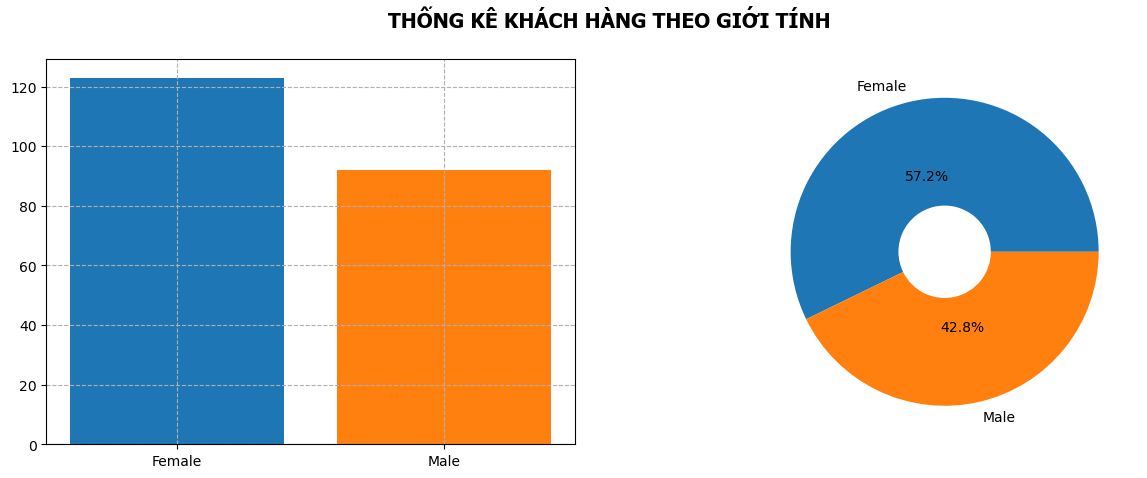

In [18]:
#Thống kê số lượng khách hàng theo giới tính:
genders = df.Gender.value_counts()
print(genders)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['Female','Male'],genders.values,color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.pie(genders.values,
        labels=genders.index,
        autopct='%1.1f%%', 
        pctdistance=0.5,
        wedgeprops=dict(width=0.7), colors=['#1E77B4','#FF7F0F'])

plt.suptitle('THỐNG KÊ KHÁCH HÀNG THEO GIỚI TÍNH', fontname='Tahoma',fontweight='bold',
                                                   fontsize=15)
plt.show()

Khách hàng bao gồm cả nam và nữ, tỷ lệ không chênh nhau nhiều. tỷ lệ nữ giới đông hơn nam giới một chút. Nữ giới chiếm 57% và nam giới là 43% --> dữ liệu tương đối cân bằng giữa nam và nữ

### 1.2 Quan sát thuộc tính tuổi của khách hàng
---
Lập biểu đồ quan sát sự phân bổ tuổi của khách hàng

In [19]:
#Quan sát đặc trưng thống kê thuộc tính tuổi:
df['Age'].describe()

count    215.000000
mean      37.948837
std       13.052095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.000000
max       70.000000
Name: Age, dtype: float64

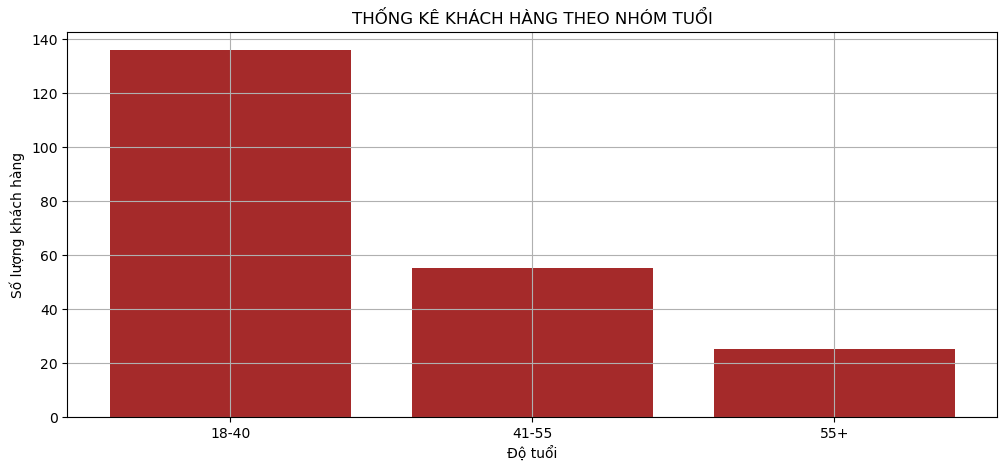

In [20]:
#Vẽ biểu đồ cột quan sát khách hàng theo từng nhóm tuổi
age18_40 = df.Age[(df.Age <= 40) & (df.Age >= 18)]
age41_55 = df.Age[(df.Age <= 55) & (df.Age > 40)]
age55above = df.Age[df.Age >=55]

x = ["18-40","41-55","55+"]
y = [len(age18_40.values),len(age41_55.values),len(age55above.values)]

plt.figure(figsize=(12,5))
plt.bar(x, y, color='brown')
plt.title("THỐNG KÊ KHÁCH HÀNG THEO NHÓM TUỔI")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

Độ tuổi của khách hàng nhỏ nhất là 18, lớn nhất là 70 tuổi, tuổi trung bình là 38 và độ tuổi chủ yếu là từ dưới 40 tuổi

## 1.3 Quan sát thuộc tính thu nhập hàng năm của khách hàng
---
Vẽ biểu đồ hộp và biểu đồ cột để thấy sự phân bố thu nhập hàng năm của khách hàng

In [21]:
#Quan sát đặc trưng thống kê thuộc tính thu nhập:
df['Annual Income (k$)'].describe()

count    215.000000
mean      59.404651
std       27.832425
min       15.000000
25%       39.000000
50%       60.000000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

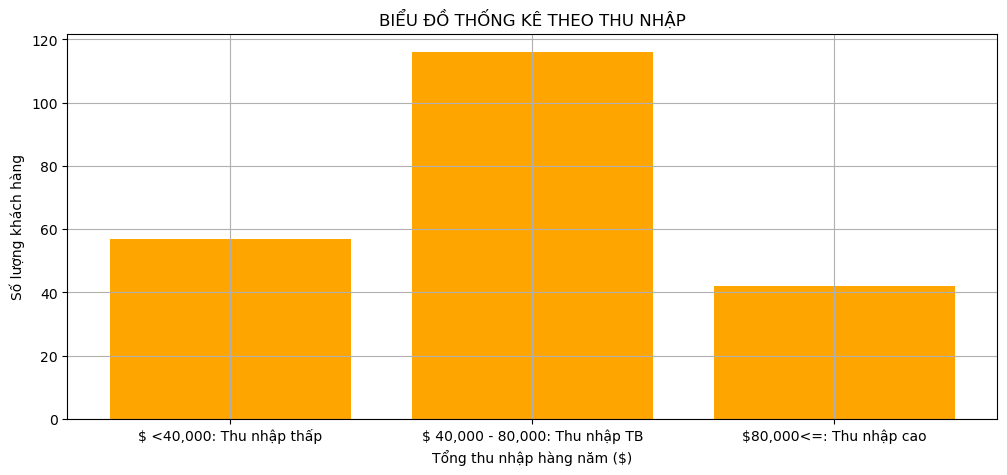

In [22]:
#Trực quan hóa dữ liệu theo từng nhóm thu nhập:
income_40 = df["Annual Income (k$)"][(df["Annual Income (k$)"] < 40)]
imcome_80 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 40) & (df["Annual Income (k$)"] < 80)]
imcome_100 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 80)]

aix = ["$ <40,000: Thu nhập thấp", "$ 40,000 - 80,000: Thu nhập TB", "$80,000<=: Thu nhập cao"]
aiy = [len(income_40.values), len(imcome_80.values), len(imcome_100.values)]

plt.figure(figsize=(12,5))
plt.bar(aix, aiy, color='orange')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO THU NHẬP")
plt.xlabel("Tổng thu nhập hàng năm ($)")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

Như vậy thu nhập hàng năm của khách hàng phần lớn trong khoảng từ 40000 - 75000. Thu nhập thấp nhất là 15000 và cao nhất là 137000 trung bình là 59,405

### 1.4 Quan sát thuộc tính điểm chi tiêu của khách hàng
---
* Thuộc tính điểm chi tiêu của khách hàng được tính dựa trên hành vi mua sắm tại trung tâm trên thang điểm 1-100.

* Thuộc tính này cho biết khả năng chi tiêu cho các mặt hàng của trung tâm thương mại. Điểm chi tiêu càng cao khách hàng càng tiêu nhiều tiền vào việc mua sắm ở trung tâm thương mại.

In [23]:
#Quan sát đặc trưng thống kê thuộc tính điểm chi tiêu:
df['Spending Score (1-100)'].describe()

count    215.000000
mean      51.497674
std       27.152197
min        1.000000
25%       29.000000
50%       51.000000
75%       75.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

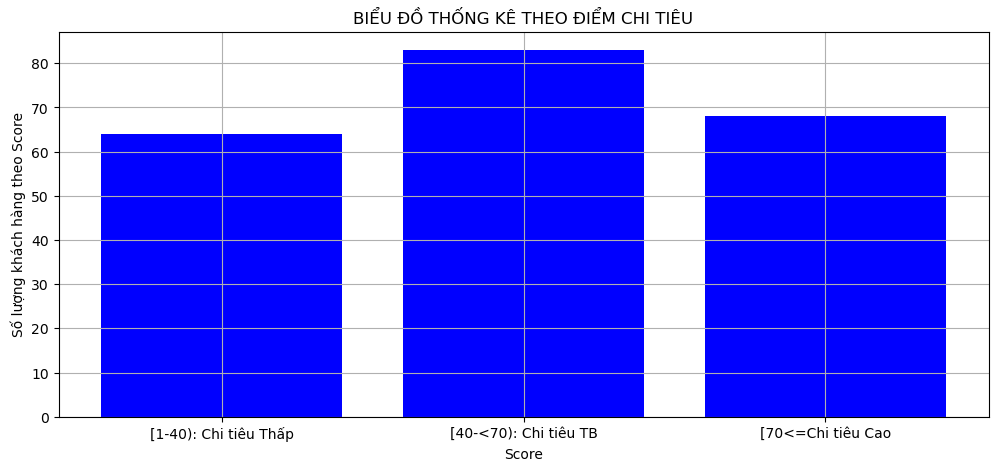

In [24]:
#Trực quan hóa dữ liệu theo từng nhóm dựa vào điểm chi tiêu:
score_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] < 40)]
score_70 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 40) & (df["Spending Score (1-100)"] < 70)]
score_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 70)]                                  

ssx = ["[1-40): Chi tiêu Thấp", "[40-<70): Chi tiêu TB", "[70<=Chi tiêu Cao"]
ssy = [len(score_40.values), len(score_70.values), len(score_100.values)]

plt.figure(figsize=(12,5))
plt.bar(ssx,ssy, color='blue')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO ĐIỂM CHI TIÊU")
plt.xlabel("Score")
plt.ylabel("Số lượng khách hàng theo Score")
plt.grid(True)
plt.show()

Như vậy điểm chi tiêu của khách hàng phần lớn trong khoảng từ 41-60 điểm. Điểm thấp nhất là 1 và cao nhất là 99 trung bình là 50,2

# 2.Tiến hành phân cụm tập dữ liệu
---

* Sử dụng 3 thuộc tính Age, Income, Score để phân cụm dữ liệu; Chia khách hàng thành từng cụm dựa trên thông số của 3 thuộc tính này.

* Các dữ liệu này đều là các con số và không có dữ liệu thiếu (missing) nên không cần phải xử lý

## 2.1 Sử dụng phương pháp khửu tay tìm số cụm tối ưu

In [25]:
#lấy dữ liệu để phân cụm dữ liệu
data_cluster = df.iloc[:,1:]
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,49,15,31
2,21,15,81
3,40,16,6
4,23,16,77
5,31,17,30


In [26]:
#lấy biến độc lập:
X_cluster = data_cluster.values

#Hiển thị 10 mẫu đầu tiên:
X_cluster[:10,]

array([[49, 15, 31],
       [21, 15, 81],
       [40, 16,  6],
       [23, 16, 77],
       [31, 17, 30],
       [22, 17, 76],
       [35, 18,  6],
       [23, 18, 94],
       [44, 19,  3],
       [30, 19, 72]], dtype=int64)

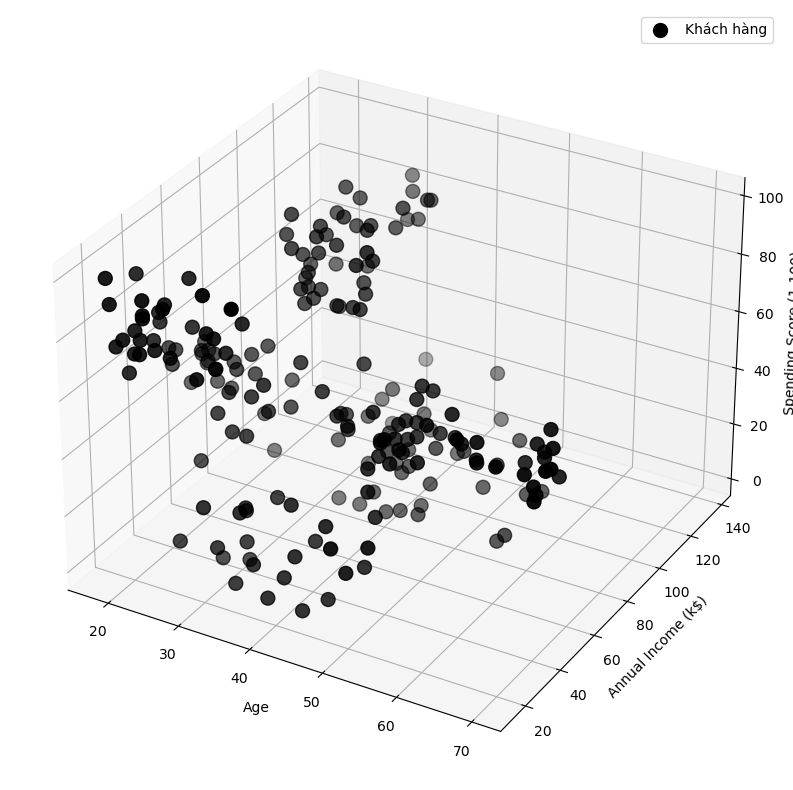

In [27]:
#Trực quan hóa dữ liệu
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

#Mỗi một KH sẽ biểu diễn thành 1 điểm trong không gian 3 chiều:
ax.scatter(data_cluster["Age"],
           data_cluster["Annual Income (k$)"], 
           data_cluster["Spending Score (1-100)"], 
           c='black', s=100,label='Khách hàng')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

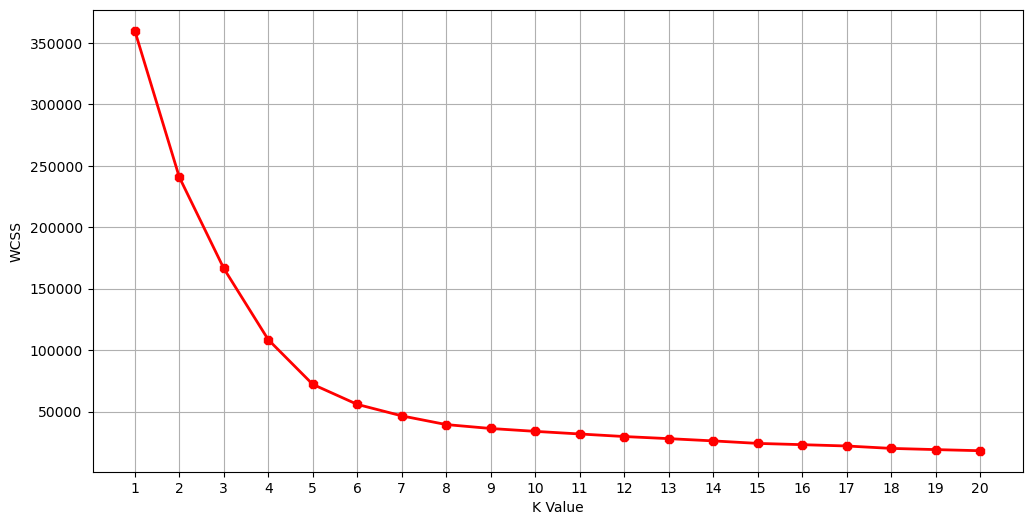

In [28]:
#PHƯƠNG PHÁP KHỬU TAY --> XÁC ĐỊNH SỐ CỤM TỐI ƯU
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 21
for k in range(1,21):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

Từ biểu đồ trên theo phương pháp khửu tay ta thấy số lượng cụm n = 5 tốt nhất

## 2.2 Tiến hành phân cụm dữ liệu với số cụm đã xác định

Với k=5. Phân chia tập dữ liệu thành 5 cụm

In [29]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 5 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=5)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Các tham số của model: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

1. n_clusters: xác định số cụm cần phần nhóm (Default=8)
2. init: thuật toán khởi tạo (k-means++, random)

In [30]:
#Thực hiện phân cụm
model_km.fit_predict(X_cluster)

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
data_cluster["Cluster"] = model_km.labels_
data_cluster

,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,49,15,31,0
2,21,15,81,4
3,40,16,6,0
4,23,16,77,4
5,31,17,30,0
...,...,...,...,...
211,21,21,81,4
212,41,21,11,0
213,50,19,21,0


3    80
1    43
2    36
4    30
0    26
Name: Cluster, dtype: int64


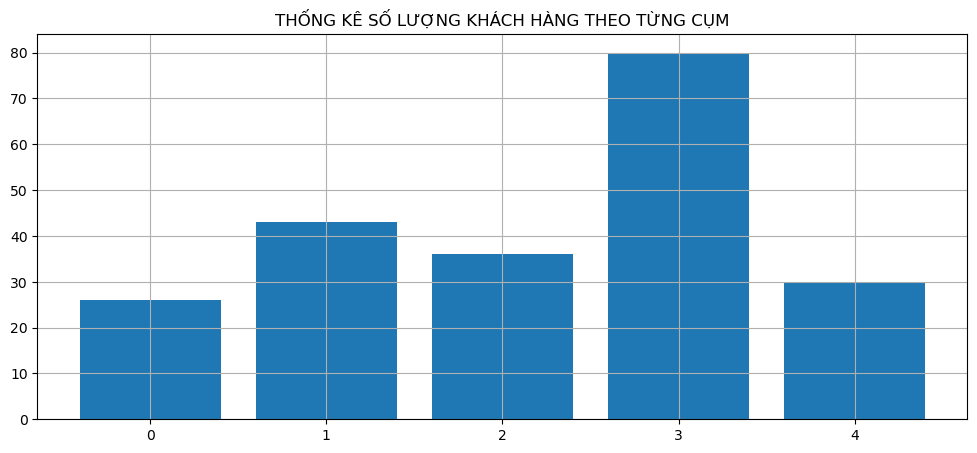

In [31]:
#Thống kê số lượng khách hàng theo mỗi cụm:
sum_cluster = data_cluster.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(12,5))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.title('THỐNG KÊ SỐ LƯỢNG KHÁCH HÀNG THEO TỪNG CỤM')
plt.grid()
plt.show()

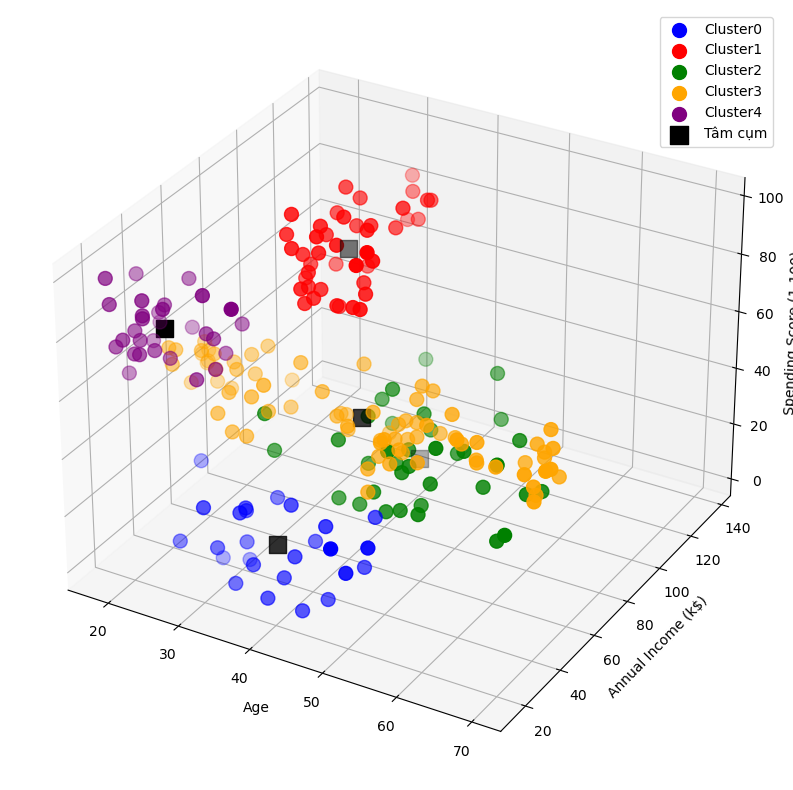

In [32]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

#Trực quan hóa cụm 0:
ax.scatter(data_cluster["Age"][data_cluster.Cluster == 0],
           data_cluster["Annual Income (k$)"][data_cluster.Cluster == 0], 
           data_cluster["Spending Score (1-100)"][data_cluster.Cluster == 0], 
           c='blue', s=100,label='Cluster0')

#Trực quan hóa cụm 1:
ax.scatter(data_cluster["Age"][data_cluster.Cluster == 1], 
           data_cluster["Annual Income (k$)"][data_cluster.Cluster == 1], 
           data_cluster["Spending Score (1-100)"][data_cluster.Cluster == 1], 
           c='red', s=100,label='Cluster1')

#Trực quan hóa cụm 2:
ax.scatter(data_cluster["Age"][data_cluster.Cluster == 2], 
           data_cluster["Annual Income (k$)"][data_cluster.Cluster == 2],
           data_cluster["Spending Score (1-100)"][data_cluster.Cluster == 2], c='green', s=100,label='Cluster2')

#Trực quan hóa cụm 3:
ax.scatter(data_cluster["Age"][data_cluster.Cluster == 3],
           data_cluster["Annual Income (k$)"][data_cluster.Cluster == 3],
           data_cluster["Spending Score (1-100)"][data_cluster.Cluster == 3], 
           c='orange', s=100,label='Cluster3')

#Trực quan hóa cụm 4:
ax.scatter(data_cluster["Age"][data_cluster.Cluster == 4], 
           data_cluster["Annual Income (k$)"][data_cluster.Cluster == 4], 
           data_cluster["Spending Score (1-100)"][data_cluster.Cluster == 4], 
           c='purple', s=100,label='Cluster4')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           model_km.cluster_centers_[:, 2], 
           color = 'black', label = 'Tâm cụm',s=150,marker='s')


plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[39. , 25.3, 18.5],
       [32.9, 88.8, 82.9],
       [43.1, 87.7, 16.7],
       [43.2, 55.1, 49.4],
       [24.2, 24.4, 82.4]])

In [34]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
model_km.inertia_

72131.35576674616

# 3.Phân tích kết quả thu được
---
Thực hiện lọc các khách hành theo từng cụm và phân tích các đặc trưng của các nhóm khách hàng để thấy được sự tương quan của các dữ liệu trong cùng một cụm


## Khách hàng Cụm 0:

In [35]:
#Danh sách khách hàng cụm 0:
cluster_0 = data_cluster[data_cluster.Cluster== 0]
print('Số KH thuộc cụm 0:', cluster_0.shape[0])
cluster_0

Số KH thuộc cụm 0: 26


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,49,15,31,0
3,40,16,6,0
5,31,17,30,0
7,35,18,6,0
9,44,19,3,0
11,27,19,14,0
13,32,20,15,0
15,37,20,13,0
17,35,21,29,0


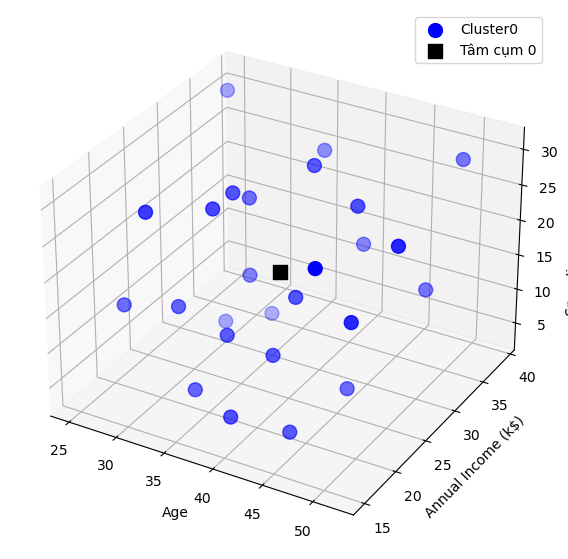

In [36]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 0:
ax.scatter(cluster_0['Age'], 
           cluster_0["Annual Income (k$)"], 
           cluster_0["Spending Score (1-100)"], 
           c='blue', s=100,label='Cluster0')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[0, 0], 
           model_km.cluster_centers_[0, 1],
           model_km.cluster_centers_[0, 2], 
           color = 'black', label = 'Tâm cụm 0',s=100,marker='s')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [37]:
#Đặc trưng thống kê của khách hàng cụm 0
cluster_0[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,26.000000,26.000000,26.000000
mean,38.961538,25.269231,18.500000
std,7.496563,7.147350,10.020978
min,25.000000,15.000000,3.000000
25%,34.000000,19.250000,11.500000
50%,38.500000,23.500000,17.500000
75%,44.750000,29.750000,28.750000
max,52.000000,39.000000,31.000000


**Đặc trưng của khách hàng cụm 0 là gì?**





Khách hàng thuộc cụm 0 có đặc điểm:
- Độ tuổi : Là nhóm khách hàng trẻ đến trung niên(25-52, trung bình 38 tuổi)
- Thu nhập: là nhóm khách hàng có thu nhập thấp (nghèo) (<39kUSD, TB 25kUSD)
- Chi tiêu: là nhóm khách hàng chi tiêu thấp, mua sắm ít, ít đến mua sắm (<31 điểm, TB 18)

## Khách hàng Cụm 1
---

In [38]:
#Danh sách khách hàng cụm 1:
cluster_1=data_cluster[data_cluster.Cluster== 1]
print('Số KH thuộc cụm 1:', cluster_1.shape[0])
cluster_1

Số KH thuộc cụm 1: 43


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
124,39,69,91,1
126,31,70,77,1
128,40,71,95,1
130,38,71,75,1
132,39,71,75,1
134,31,72,71,1
136,29,73,88,1
138,32,73,73,1
140,35,74,72,1


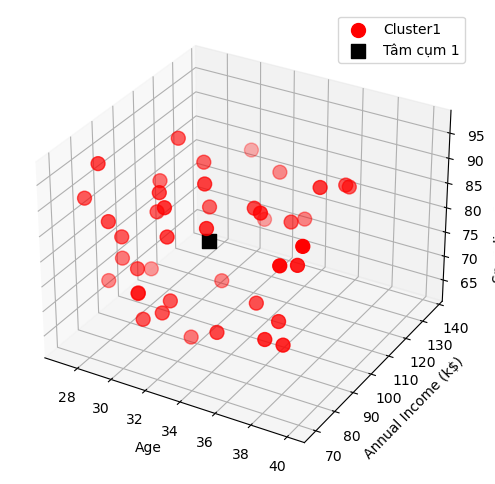

In [39]:
#Trực quan hóa dữ liệu
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 1:
ax.scatter(cluster_1["Age"], 
           cluster_1["Annual Income (k$)"], 
           cluster_1["Spending Score (1-100)"], 
           c='red', s=100,label='Cluster1')

#Hiển thị tâm cụm 1:
ax.scatter(model_km.cluster_centers_[1, 0], 
           model_km.cluster_centers_[1, 1],
           model_km.cluster_centers_[1, 2], 
           color = 'black', label = 'Tâm cụm 1',s=100, marker='s')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [40]:
#Đặc trưng thống kê của khách hàng Cụm 1
cluster_1[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,43.000000,43.000000,43.000000
mean,32.906977,88.767442,82.906977
std,3.734103,17.329904,9.309018
min,27.000000,69.000000,63.000000
25%,30.000000,76.500000,75.000000
50%,32.000000,85.000000,85.000000
75%,36.000000,99.000000,90.500000
max,40.000000,137.000000,97.000000


**Đặc trưng của khách hàng Cụm 1 là gì?**




Khách hàng thuộc cụm 1 có đặc điểm:
- Độ tuổi : Là nhóm khách hàng trẻ đến trung niên(27-40, trung bình 32 tuổi)
- Thu nhập: là nhóm khách hàng có thu nhập cao (giàu, khá giả) (>69kUSD, TB 88kUSD)
- Chi tiêu: là nhóm khách hàng chi tiêu cao, mua sắm nhiều, đến mua sắm nhiều (>63 điểm, TB 82)

## Khách hàng Cụm 2:
---

In [41]:
#Danh sách khách hàng cụm 2:
cluster_2 = data_cluster[data_cluster.Cluster== 2]
print('Số KH thuộc cụm 2:', cluster_2.shape[0])
cluster_2

Số KH thuộc cụm 2: 36


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
125,43,70,29,2
129,59,71,11,2
131,47,71,9,2
133,25,72,28,2
135,42,73,5,2
137,44,73,7,2
139,40,74,10,2
141,57,75,5,2
145,25,77,12,2


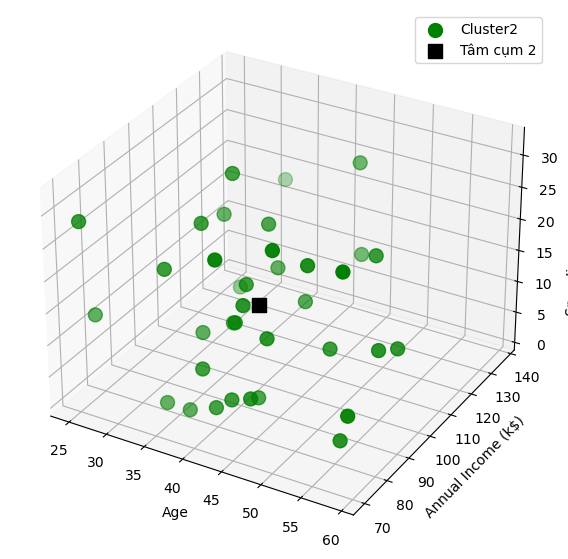

In [42]:
#Trực quan hóa dữ liệu:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 2:
ax.scatter(cluster_2["Age"], 
           cluster_2["Annual Income (k$)"], 
           cluster_2["Spending Score (1-100)"],
           c='green', s=100,label='Cluster2')

#Hiển thị tâm cụm 2:
ax.scatter(model_km.cluster_centers_[2, 0], 
           model_km.cluster_centers_[2, 1],
           model_km.cluster_centers_[2, 2], 
           color = 'black', label = 'Tâm cụm 2',s=100,marker='s')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [43]:
#Đặc trưng thống kê của khách hàng cụm 2:
cluster_2[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,36.000000,36.000000,36.000000
mean,43.138889,87.750000,16.694444
std,8.870989,16.387059,8.772748
min,25.000000,70.000000,1.000000
25%,36.750000,77.000000,10.000000
50%,43.000000,83.000000,16.000000
75%,47.250000,97.250000,24.250000
max,59.000000,137.000000,32.000000


**Đặc trưng của khách hàng cụm 2 là gì?**

Khách hàng thuộc cụm 2 có đặc điểm:
- Độ tuổi : Là nhóm khách hàng trung niên(25-59, trung bình 43 tuổi)
- Thu nhập: là nhóm khách hàng có thu nhập cao (giàu, khá giả) (>70kUSD, TB 87kUSD)
- Chi tiêu: là nhóm khách hàng chi tiêu nhiều, mua sắm ít, ít đến mua sắm (<32 điểm, TB 16)

## Khách hàng Cụm 3:
---

In [44]:
#Danh sách khách hàng Cụm 3:
cluster_3 = data_cluster[data_cluster.Cluster== 3]
print('Số KH thuộc cụm 3:', cluster_3.shape[0])
cluster_3

Số KH thuộc cụm 3: 80


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
43,48,39,36,3
47,50,40,55,3
48,27,40,47,3
49,29,40,42,3
50,31,40,42,3
...,...,...,...,...
121,27,67,56,3
122,38,67,40,3
123,40,69,58,3


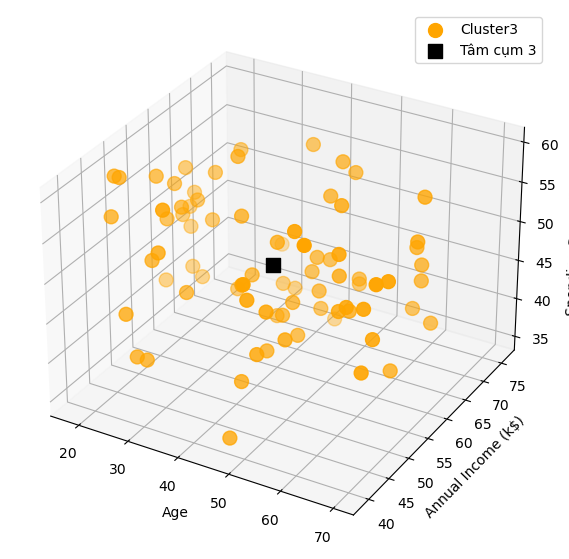

In [45]:
#Trực quan hóa dữ liệu:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 3:
ax.scatter(cluster_3['Age'], 
           cluster_3["Annual Income (k$)"], 
           cluster_3["Spending Score (1-100)"], 
           c='orange', s=100,label='Cluster3')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[3, 0], 
           model_km.cluster_centers_[3, 1],
           model_km.cluster_centers_[3, 2], 
           color = 'black', label = 'Tâm cụm 3',s=100,marker='s')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [46]:
#Đặc trưng thống kê của khách hàng cụm 3:
cluster_3[['Age',
           'Annual Income (k$)',
           'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,80.00000,80.000000,80.000000
mean,43.15000,55.087500,49.400000
std,16.38315,8.844928,6.385506
min,18.00000,39.000000,35.000000
25%,27.00000,48.000000,43.750000
50%,47.00000,54.000000,49.500000
75%,54.25000,62.000000,55.000000
max,70.00000,76.000000,60.000000


**Đặc trưng của khách hàng cụm 3 là gì?**




Khách hàng thuộc cụm 3 có đặc điểm:
- Độ tuổi : Là nhóm khách hàng trẻ đến già(18-70, trung bình 43 tuổi)
- Thu nhập: là nhóm khách hàng có thu nhập trung bình (khá giả) (<76kUSD, TB 55kUSD)
- Chi tiêu: là nhóm khách hàng chi tiêu cao, mua sắm nhiều, thi thoảng đến mua sắm (>35 điểm, TB 49 điểm)

## Khách hàng Cụm 4:
---

In [47]:
#Danh sách khách hàng Cụm 4:
cluster_4 = data_cluster[data_cluster.Cluster== 4]
print('Số KH thuộc cụm 4:',cluster_4.shape[0])
cluster_4

Số KH thuộc cụm 4: 30


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
2,21,15,81,4
4,23,16,77,4
6,22,17,76,4
8,23,18,94,4
10,30,19,72,4
12,35,19,99,4
14,24,20,77,4
16,22,20,79,4
18,20,21,66,4


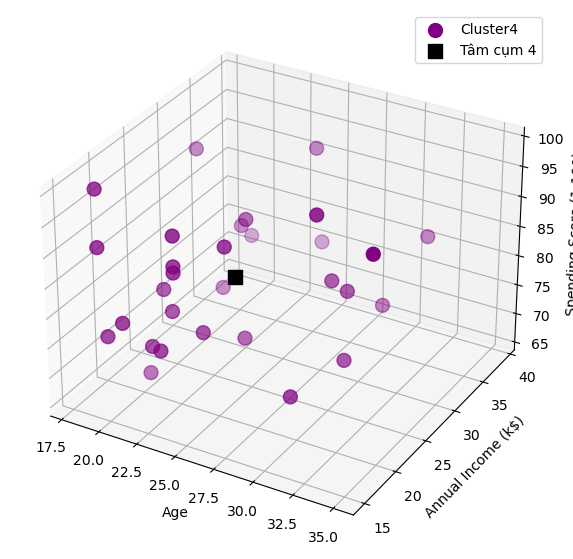

In [48]:
# Trực quan hóa dữ liệu
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')

#Hiển thị các mẫu thuộc cụm 4:
ax.scatter(cluster_4['Age'], 
           cluster_4["Annual Income (k$)"], 
           cluster_4["Spending Score (1-100)"], 
           c='purple', s=100,label='Cluster4')

#Hiển thị tâm cụm:
ax.scatter(model_km.cluster_centers_[4, 0], 
           model_km.cluster_centers_[4, 1],
           model_km.cluster_centers_[4, 2], 
           color = 'black', label = 'Tâm cụm 4',s=100,marker='s')

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [49]:
#Đặc trưng thống kê của khách hàng cụm 4
cluster_4[['Age',
           'Annual Income (k$)',
           'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,30.000000,30.000000,30.000000
mean,24.200000,24.400000,82.433333
std,4.482918,7.788586,8.916019
min,18.000000,15.000000,66.000000
25%,21.000000,18.000000,75.250000
50%,23.000000,21.000000,81.000000
75%,28.000000,29.750000,90.500000
max,35.000000,39.000000,99.000000


**Đặc trưng của khách hàng Cụm 4 là gì?**


Khách hàng thuộc cụm 4 có đặc điểm:
- Độ tuổi : Là nhóm khách hàng trẻ (18-35, trung bình 24 tuổi)
- Thu nhập: là nhóm khách hàng có thu nhập thấp (nghèo) (<39kUSD, TB 25kUSD)
- Chi tiêu: là nhóm khách hàng chi tiêu thấp, mua sắm nhiều, đến mua sắm nhiều (>66 điểm, TB 82 điểm)

**YÊU CẦU:**
Tiến hành phân tích đặc trưng của khách hàng theo từng cụm ở trên --> Sinh viên thực hiện xếp mỗi cụm khách hàng vào từng hạng như sau:
1. Hạng Kim cương (Khách hàng rất quan trọng)
2. Hạng Vàng 
3. Hạng Bạc
4. Hạng Đồng
5. Hạng Chì (Khách hàng không quan trọng)

**---> Như vậy từ kết quả phân nhóm trên, trung tâm thương mại hoàn toàn đưa ra những chiến lược khuyến mại hoặc thu hút khách hàng riêng biệt phù hợp cho từng nhóm**


## Kết luận:
- Cụm 0: nhóm kh trẻ (18-35), có thu nhập thấp, mua sắm thường xuyên --> Hạng bạc
- Cụm 1: nhóm kh trung niên (25-52), thu nhập thấp, mua sắm ít --> Hạng chì
- Cụm 2: nhóm kh từ trẻ đến già (18-70), có thu nhập trung bình, mua sắm thường xuyên --> Hạng vàng
- Cụm 3: nhóm kh trung niên (25-59), có thu nhập cao, mua sắm ít --> Hạng đồng
- Cụm 4: nhóm kh trung niên (27-40), có thu nhập cao, mua sắm thường xuyên --> Hạng kim cương


## THỰC HÀNH
---
Mô tả tập dữ liệu: Data_sales_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Sử dụng phương pháp khửu tay, Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa kết quả phân cụm, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [ ]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}








